<a href="https://colab.research.google.com/github/bodamohannaik/DLAI-TF-DPC/blob/master/C1/W2/fashion_mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load Dataset

In [2]:
(data_train, labels_train), (data_test, labels_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(f"data_train shape : {data_train.shape}, labels_train shape: {labels_train.shape}")
print(f"data_test shape : {data_test.shape}, labels_test shape: {labels_test.shape}")

data_train shape : (60000, 28, 28), labels_train shape: (60000,)
data_test shape : (10000, 28, 28), labels_test shape: (10000,)


In [4]:
data_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
labels_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

# Visualize the Data

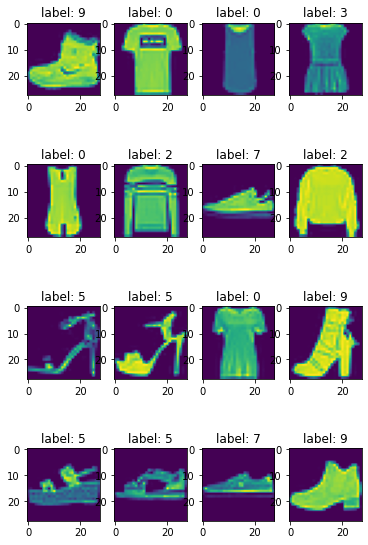

In [6]:
fig, axs = plt.subplots(4, 4, figsize = (6,10))
for i in range(16):
  ax = plt.subplot(4,4, i+1)
  ax.imshow(data_train[i])
  ax.set_title(f"label: {labels_train[i]}")

In [7]:
data_train.max()

255


Label	Description
0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

# Neural Network

In [8]:
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=data_train.shape[1:]),
              tf.keras.layers.Rescaling(scale = 1/data_train.max()),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(units=32, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [10]:
# fit the model
model.fit(x = data_train, y=labels_train, epochs = 10, batch_size=32, validation_data = (data_test, labels_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5462 - accuracy: 0.8122 - val_loss: 0.4792 - val_accuracy: 0.8286
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4185 - accuracy: 0.8512 - val_loss: 0.4186 - val_accuracy: 0.8499
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3827 - accuracy: 0.8628 - val_loss: 0.4103 - val_accuracy: 0.8560
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3575 - accuracy: 0.8714 - val_loss: 0.4048 - val_accuracy: 0.8545
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3396 - accuracy: 0.8767 - val_loss: 0.3857 - val_accuracy: 0.8589
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3262 - accuracy: 0.8819 - val_loss: 0.3618 - val_accuracy: 0.8666
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3142 - accuracy: 0.8847 - val_loss: 0.3780 - val_accuracy:

# Exercises 

In [11]:
# softmax
data = np.array([[2.0,1.0,4.0,3.0]])
tensor = tf.convert_to_tensor(data)
print(tensor)
data_softmax = tf.keras.activations.softmax(tensor)
print(data_softmax)
print(f"sum: {tf.reduce_sum(data_softmax)}")
print(f"max index:{tf.argmax(data_softmax, axis = -1)} ")

tf.Tensor([[2. 1. 4. 3.]], shape=(1, 4), dtype=float64)
tf.Tensor([[0.08714432 0.0320586  0.64391426 0.23688282]], shape=(1, 4), dtype=float64)
sum: 1.0
max index:[2] 


In [12]:
# exercise 2, we get probabilites 
labels_test_pred = model.predict(data_test)
labels_test[0], labels_test_pred[0]

(9, array([9.3037052e-08, 8.3609191e-09, 1.4629246e-07, 6.5248554e-07,
        9.2422617e-08, 5.8258023e-02, 5.4199529e-07, 5.6381587e-02,
        6.7150977e-04, 8.8468742e-01], dtype=float32))

In [13]:
# excercise 3, more units sometimes can give better accuracy and overfit
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=data_train.shape[1:]),
              tf.keras.layers.Rescaling(scale = 1/data_train.max()),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(units=1024, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()
# compile
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
# fit the model
model.fit(x = data_train, y=labels_train, epochs = 10, batch_size=32, validation_data = (data_test, labels_test))
labels_test_pred = model.predict(data_test)
labels_test[0], labels_test_pred[0]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              803840    
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4699 - accuracy: 0.8323 - val_loss: 0.4536 - val_accuracy: 0.8285
Epoch 2/10
1875/1875 [=============

(9, array([1.8047797e-07, 1.2397913e-10, 3.7876982e-10, 5.7945337e-12,
        1.2218510e-10, 7.4490457e-04, 1.7076183e-09, 1.7263212e-03,
        1.1745598e-08, 9.9752861e-01], dtype=float32))

In [14]:
# excercise 4 - remove Flatten layer
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=data_train.shape[1:]),
              tf.keras.layers.Rescaling(scale = 1/data_train.max()),
              # tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(units=1024, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()
# compile
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
# fit the model
model.fit(x = data_train, y=labels_train, epochs = 10, batch_size=32, validation_data = (data_test, labels_test))
labels_test_pred = model.predict(data_test)
labels_test[0], labels_test_pred[0]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28)            0         
                                                                 
 dense_4 (Dense)             (None, 28, 1024)          29696     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            10250     
                                                                 
Total params: 39,946
Trainable params: 39,946
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: ignored

In [15]:
# excercise 5 - more hidden layers, overfits , simple tasks does not require hidden layers
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=data_train.shape[1:]),
              tf.keras.layers.Rescaling(scale = 1/data_train.max()),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(units=512, activation='relu'),
              tf.keras.layers.Dense(units=256, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()
# compile
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
# fit the model
model.fit(x = data_train, y=labels_train, epochs = 10, batch_size=32, validation_data = (data_test, labels_test))
labels_test_pred = model.predict(data_test)
labels_test[0], labels_test_pred[0]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==========================

(9, array([4.3124219e-11, 4.4814625e-12, 5.3836692e-11, 2.4831262e-08,
        2.2792229e-08, 2.0178024e-05, 2.6230218e-10, 1.7865754e-04,
        2.2158229e-10, 9.9980110e-01], dtype=float32))

In [16]:
# excercise 6 - more epochs , not needed if it converges quickly 
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=data_train.shape[1:]),
              tf.keras.layers.Rescaling(scale = 1/data_train.max()),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(units=32, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()
# compile
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
# fit the model
model.fit(x = data_train, y=labels_train, epochs = 30, batch_size=32, validation_data = (data_test, labels_test))
labels_test_pred = model.predict(data_test)
labels_test[0], labels_test_pred[0]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 32)                25120     
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5482 - accuracy: 0.8123 - val_loss: 0.4611 - val_accuracy: 0.8384
Epoch 2/30
1875/1875 [================

(9, array([6.2469629e-09, 2.6497112e-16, 3.6347627e-09, 4.3214634e-16,
        5.5229575e-12, 5.7720864e-04, 4.5549921e-08, 2.5576842e-04,
        1.6375700e-12, 9.9916697e-01], dtype=float32))

In [17]:
# excercise 7 - without feature scaling
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=data_train.shape[1:]),
              # tf.keras.layers.Rescaling(scale = 1/data_train.max()),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(units=32, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()
# compile
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
# fit the model
model.fit(x = data_train, y=labels_train, epochs = 10, batch_size=32, validation_data = (data_test, labels_test))
labels_test_pred = model.predict(data_test)
labels_test[0], labels_test_pred[0]

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7187 - accuracy: 0.4030 - val_loss: 1.5275 - val_accuracy: 0.4082
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3446 - accuracy: 0.5004 - val_loss: 1.2013 - val_accuracy: 0.5731
Epoch 3/10
1875/1875 [====

(9, array([9.7443606e-26, 5.0721155e-10, 0.0000000e+00, 7.0384955e-14,
        0.0000000e+00, 8.3372556e-02, 9.7868425e-23, 8.0290206e-02,
        3.7204224e-09, 8.3633721e-01], dtype=float32))

# Callbacks

In [23]:
class MyCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs = {}):
    print(f"\n{'*'*80}\nepoch: {epoch}, logs: {logs}\n{'*'*80}\n")
    if logs['accuracy'] > .90:
      print(f"\n{'#'*20} stop{'#'*20}")
      self.model.stop_training = True
mycallback = MyCallback()

In [24]:
# using callbacks
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=data_train.shape[1:]),
              tf.keras.layers.Rescaling(scale = 1/data_train.max()),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(units=512, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()
# compile
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
# fit the model
model.fit(x = data_train, y=labels_train, epochs = 10, batch_size=32, validation_data = (data_test, labels_test),
          callbacks = [mycallback])
labels_test_pred = model.predict(data_test)
labels_test[0], labels_test_pred[0]

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dense_18 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.4790 - accuracy: 0.8291
********************************************************************************
e

(9, array([3.1514197e-08, 1.2911952e-09, 2.0745012e-11, 2.4376356e-12,
        4.9990667e-10, 2.5773433e-03, 3.9341859e-09, 1.0632793e-03,
        2.9701649e-10, 9.9635929e-01], dtype=float32))